# Capstone Project - The Battle of Neighborhoods

## Background

## Data

In [1]:
import numpy as np 

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [2]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
import folium 
from geopy.geocoders import Nominatim 

In [3]:
List_url='https://en.wikipedia.org/wiki/List_of_cities_in_Ohio'
source = requests.get(List_url).text
soup = BeautifulSoup(source, 'xml')
table=soup.find('table')
column_names=['City','Population','County']
df = pd.DataFrame(columns=column_names)
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data
        df.head()

In [4]:
df.head()

,City,Population,County
0,Akron,"198,006",Summit
1,Alliance,"21,616",Mahoning
2,Amherst,"12,021",Lorain
3,Ashland,"20,423",Ashland
4,Ashtabula,"18,079",Ashtabula


In [5]:
df.head()

,City,Population,County
0,Akron,"198,006",Summit
1,Alliance,"21,616",Mahoning
2,Amherst,"12,021",Lorain
3,Ashland,"20,423",Ashland
4,Ashtabula,"18,079",Ashtabula


In [6]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [7]:
# read data from github with location info for all the cities in OH, (geo_df)
geo_df=pd.read_csv('https://raw.githubusercontent.com/yywang118/Coursera-Capstone/master/OHIO_location.csv')

In [8]:
geo_df.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,NaN,39.969238,-82.936864,Bexley,OH,Ohio,True,NaN,2810,34.9,39089,Franklin,NaN,NaN,NaN,NaN,NaN,NaN
1,43001.0,40.088650,-82.613630,Alexandria,OH,Ohio,True,NaN,2810,34.9,39089,Licking,{'39089':100},Licking,39089,False,False,America/New_York
2,43002.0,40.063330,-83.173900,Amlin,OH,Ohio,True,NaN,3744,872.4,39049,Franklin,{'39049':100},Franklin,39049,False,False,America/New_York
3,43003.0,40.410340,-82.975380,Ashley,OH,Ohio,True,NaN,3005,33.2,39041,Delaware,"{'39041':74.7,'39117':25.3}",Delaware|Morrow,39041|39117,False,False,America/New_York
4,43004.0,40.015810,-82.800120,Blacklick,OH,Ohio,True,NaN,26139,678.2,39049,Franklin,{'39049':100},Franklin,39049,False,False,America/New_York


In [9]:
geo_df_loc=geo_df[['zip','lat','lng','city','county_name']]

In [10]:
geo_df_loc.head()

,zip,lat,lng,city,county_name
0,NaN,39.969238,-82.936864,Bexley,Franklin
1,43001.0,40.088650,-82.613630,Alexandria,Licking
2,43002.0,40.063330,-83.173900,Amlin,Franklin
3,43003.0,40.410340,-82.975380,Ashley,Delaware
4,43004.0,40.015810,-82.800120,Blacklick,Franklin


In [11]:
## merge the two dataset
geo_df_loc.rename(columns={'county_name':'County'},inplace=True)
geo_df_loc.rename(columns={'city':'City'},inplace=True)
##geo_merged = pd.merge(df,geo_df_loc, on='City')
##geo_merged.head()
##geo_concat=pd.concat([df, geo_df_loc.reindex(df['City'])], axis=1)

#pd.merge_asof(df, geo_df_loc, on='City',by='County')
#geo_merged=pd.merge(df, geo_df_loc, on='City',  how='left')
geo_merged = df.merge(geo_df_loc, on="City", how = 'inner')

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [12]:
geo_merged.head()

,City,Population,County_x,zip,lat,lng,County_y
0,Akron,"198,006",Summit,44301.0,41.04386,-81.52450,Summit
1,Akron,"198,006",Summit,44302.0,41.08955,-81.53883,Summit
2,Akron,"198,006",Summit,44303.0,41.10467,-81.53686,Summit
3,Akron,"198,006",Summit,44304.0,41.08306,-81.50782,Summit
4,Akron,"198,006",Summit,44305.0,41.07587,-81.46140,Summit


In [13]:
geo_merged.drop_duplicates(subset ="City", 
                     keep = "first", inplace = True) 

In [14]:
geo_merged.head()

,City,Population,County_x,zip,lat,lng,County_y
0,Akron,"198,006",Summit,44301.0,41.04386,-81.52450,Summit
17,Alliance,"21,616",Mahoning,44601.0,40.91935,-81.13021,Stark
18,Amherst,"12,021",Lorain,44001.0,41.36494,-82.26177,Lorain
19,Ashland,"20,423",Ashland,44805.0,40.87292,-82.31686,Ashland
20,Ashtabula,"18,079",Ashtabula,44004.0,41.85339,-80.78858,Ashtabula


In [15]:
geo_final_data=geo_merged[['City','Population','County_y','zip','lat','lng']]


In [16]:
franklin_data=geo_final_data[geo_final_data['County_y'].str.contains("Franklin",na=False)]
franklin_data

,City,Population,County_y,zip,lat,lng
34,Bexley,"13,057",Franklin,NaN,39.969238,-82.936864
46,Canal Winchester,"7,101",Franklin,43110.0,39.826340,-82.799450
141,Columbus,"892,672",Franklin,43085.0,40.099860,-83.015700
207,Dublin,"48,647",Franklin,43016.0,40.098590,-83.153760
228,Grove City,"41,627",Franklin,43123.0,39.868550,-83.119880
229,Groveport,"5,363",Franklin,43125.0,39.836640,-82.884460
235,Hilliard,"33,672",Franklin,43026.0,40.022750,-83.185520
289,New Albany,"7,724",Franklin,43054.0,40.080840,-82.803480
315,Reynoldsburg,"35,893",Franklin,43068.0,39.956370,-82.785020
379,Westerville,"36,120",Franklin,43081.0,40.110640,-82.891340


In [17]:
franklin_data

,City,Population,County_y,zip,lat,lng
34,Bexley,"13,057",Franklin,NaN,39.969238,-82.936864
46,Canal Winchester,"7,101",Franklin,43110.0,39.826340,-82.799450
141,Columbus,"892,672",Franklin,43085.0,40.099860,-83.015700
207,Dublin,"48,647",Franklin,43016.0,40.098590,-83.153760
228,Grove City,"41,627",Franklin,43123.0,39.868550,-83.119880
229,Groveport,"5,363",Franklin,43125.0,39.836640,-82.884460
235,Hilliard,"33,672",Franklin,43026.0,40.022750,-83.185520
289,New Albany,"7,724",Franklin,43054.0,40.080840,-82.803480
315,Reynoldsburg,"35,893",Franklin,43068.0,39.956370,-82.785020
379,Westerville,"36,120",Franklin,43081.0,40.110640,-82.891340


In [18]:
#franklin_data = franklin_data[franklin_data.City != 'Groveport']
#franklin_data = franklin_data[franklin_data.City != 'New Albany']
#franklin_data = franklin_data[franklin_data.City != 'Canal Winchester']

In [19]:
franklin_data

,City,Population,County_y,zip,lat,lng
34,Bexley,"13,057",Franklin,NaN,39.969238,-82.936864
46,Canal Winchester,"7,101",Franklin,43110.0,39.826340,-82.799450
141,Columbus,"892,672",Franklin,43085.0,40.099860,-83.015700
207,Dublin,"48,647",Franklin,43016.0,40.098590,-83.153760
228,Grove City,"41,627",Franklin,43123.0,39.868550,-83.119880
229,Groveport,"5,363",Franklin,43125.0,39.836640,-82.884460
235,Hilliard,"33,672",Franklin,43026.0,40.022750,-83.185520
289,New Albany,"7,724",Franklin,43054.0,40.080840,-82.803480
315,Reynoldsburg,"35,893",Franklin,43068.0,39.956370,-82.785020
379,Westerville,"36,120",Franklin,43081.0,40.110640,-82.891340


In [20]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = '4VD0V2405OACGG0WALX5JWAXVM3BXYIUU1UUP3H1CGG31ODJ' # your Foursquare ID
    CLIENT_SECRET = 'FMN2SIOZGDHRYCEH3UWO4HXCDYT0YUPRPN24FOLJIAIAVDS0' # your Foursquare Secret
    VERSION = '20200212'
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [21]:
def get_venue_details(venue_id):
        
    CLIENT_ID = '4VD0V2405OACGG0WALX5JWAXVM3BXYIUU1UUP3H1CGG31ODJ' # your Foursquare ID
    CLIENT_SECRET = 'FMN2SIOZGDHRYCEH3UWO4HXCDYT0YUPRPN24FOLJIAIAVDS0' # your Foursquare Secret
    VERSION = '20200212'
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [22]:
def getNearbyVenues(names, latitudes, longitudes):
    CLIENT_ID = '4VD0V2405OACGG0WALX5JWAXVM3BXYIUU1UUP3H1CGG31ODJ' # your Foursquare ID
    CLIENT_SECRET = 'FMN2SIOZGDHRYCEH3UWO4HXCDYT0YUPRPN24FOLJIAIAVDS0' # your Foursquare Secret
    VERSION = '20200212'
    radius=15000
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
franklin_venues = getNearbyVenues(names=franklin_data['City'],
                                   latitudes=franklin_data['lat'],
                                   longitudes=franklin_data['lng']
                                  )

Bexley
Canal Winchester
Columbus
Dublin
Grove City
Groveport
Hilliard
New Albany
Reynoldsburg
Westerville


In [24]:
franklin_venues.shape

(1000, 7)

In [25]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

franklin_venues_only_restaurant = franklin_venues[franklin_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
franklin_venues_only_restaurant.index = np.arange(1, len(franklin_venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", franklin_venues_only_restaurant.shape)
franklin_venues_only_restaurant

Shape of the Data-Frame with Venue Category only Restaurant:  (239, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Bexley,39.969238,-82.936864,Giuseppe's Ritrovo,39.957316,-82.938282,Italian Restaurant
2,Bexley,39.969238,-82.936864,Brassica,39.957333,-82.940051,Mediterranean Restaurant
3,Bexley,39.969238,-82.936864,Tavern Olde Towne,39.962913,-82.976560,Restaurant
4,Bexley,39.969238,-82.936864,Schmidt's Restaurant und Sausage Haus,39.946222,-82.990993,German Restaurant
5,Bexley,39.969238,-82.936864,Brassica,39.976273,-83.003219,Restaurant
6,Bexley,39.969238,-82.936864,Lindey's,39.950775,-82.993778,American Restaurant
7,Bexley,39.969238,-82.936864,Arepazo Tapas Bar Grill,39.951473,-82.998798,Latin American Restaurant
8,Bexley,39.969238,-82.936864,The Guild House,39.975110,-83.002959,American Restaurant
9,Bexley,39.969238,-82.936864,Club 185,39.952528,-82.993522,American Restaurant
10,Bexley,39.969238,-82.936864,G. Michael's Bistro & Bar,39.950251,-82.995821,New American Restaurant


In [26]:
#franklin_venues.groupby('Neighborhood').count()
#franklin_venues_only_restaurant.groupby('Neighborhood').count()
print (franklin_venues_only_restaurant['Venue Category'].value_counts())

American Restaurant              51
Mexican Restaurant               28
Italian Restaurant               21
Fast Food Restaurant             18
Greek Restaurant                 14
Asian Restaurant                 14
Mediterranean Restaurant         12
Sushi Restaurant                 11
Japanese Restaurant               7
Chinese Restaurant                7
Thai Restaurant                   6
Restaurant                        5
Seafood Restaurant                5
Vietnamese Restaurant             4
French Restaurant                 4
German Restaurant                 4
Middle Eastern Restaurant         3
Indian Restaurant                 3
Latin American Restaurant         3
New American Restaurant           2
Arepa Restaurant                  2
Korean Restaurant                 2
Ramen Restaurant                  2
Fondue Restaurant                 2
Vegetarian / Vegan Restaurant     2
Modern European Restaurant        1
Hotpot Restaurant                 1
Tapas Restaurant            

In [27]:

# create a dataframe of top 10 categories
franklin_venues_only_restaurant_Top10 = franklin_venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
franklin_venues_only_restaurant_Top10=franklin_venues_only_restaurant_Top10.reset_index()
#Franklin_5_Dist_Venues_Top10

franklin_venues_only_restaurant_Top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
franklin_venues_only_restaurant_Top10

,Venue Category,Frequency
0,American Restaurant,51
1,Mexican Restaurant,28
2,Italian Restaurant,21
3,Fast Food Restaurant,18
4,Greek Restaurant,14
5,Asian Restaurant,14
6,Mediterranean Restaurant,12
7,Sushi Restaurant,11
8,Japanese Restaurant,7
9,Chinese Restaurant,7


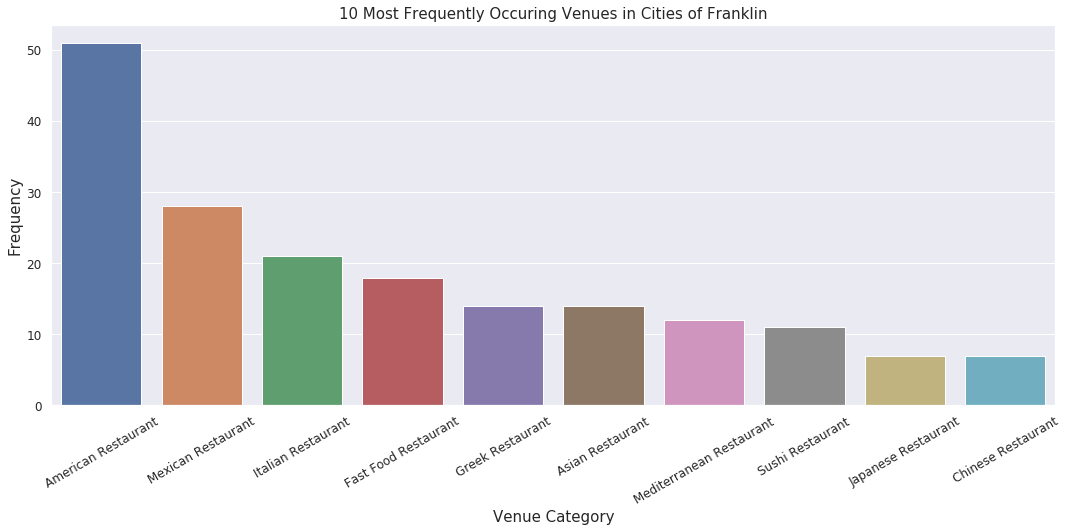

In [41]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=franklin_venues_only_restaurant_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in Cities of Franklin', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [58]:
# one hot encoding
franklin_onehot = pd.get_dummies(franklin_venues[['Venue Category']], prefix="", prefix_sep="")
franklin_onehot['Neighborhood'] = franklin_venues['Neighborhood'] 


In [59]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:
franklin_grouped = franklin_onehot.groupby('Neighborhood').mean().reset_index()
franklin_grouped

,Neighborhood,Airport Service,American Restaurant,Antique Shop,Aquarium,Arepa Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Café,Cajun / Creole Restaurant,Casino,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Farm,Farmers Market,Fast Food Restaurant,Fondue Restaurant,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Herbs & Spices Store,Historic Site,Hockey Arena,Hookah Bar,Hot Dog Joint,Hotel,Hotpot Restaurant,Hunting Supply,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Lingerie Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Museum,New American Restaurant,Noodle House,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Recreation Center,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Stadium,Spa,Spiritual Center,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Wine Shop,Winery,Wings Joint,Zoo,Zoo Exhibit
0,Bexley,0.00,0.05,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.03,0.00,0.06,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.04,0.01,0.05,0.00,0.00,0.00,0.00,0.01,0.03,0.05,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.05,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.02,0.00,0.00,0.03,0.00,0.03,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00
1,Canal Winchester,0.00,0.05,0.01,0.00,0.00,0.00,0.00,0.02,0.02,0.01,0.03,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.04,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.02,0.00,0.01,0.00,0.03,0.01,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.01,0.01,0.04,0.04,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.05,0.01,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00
2,Columbus,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.03,0.01,0.01,0.01,0.00,0.04,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.02,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.03,0.00,0.02,0.00,0.01,0.00,0.03,0.00,0.00,0.00,0.03,0.09,0.03,0.00,0.00,0.01,0.00,0.00,0.00,0.00

In [61]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = franklin_grouped['Neighborhood']

for ind in np.arange(franklin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(franklin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bexley,Pizza Place,Bar,Park,American Restaurant,Gastropub,Coffee Shop,Café,Brewery,Taco Place,Cocktail Bar
1,Canal Winchester,Pizza Place,Coffee Shop,Park,American Restaurant,Brewery,Supermarket,Gym / Fitness Center,Gym,Ice Cream Shop,Italian Restaurant
2,Columbus,Grocery Store,Ice Cream Shop,American Restaurant,Park,Bar,Gastropub,Steakhouse,Fried Chicken Joint,Greek Restaurant,Asian Restaurant
3,Dublin,Zoo Exhibit,American Restaurant,Pizza Place,Mexican Restaurant,Italian Restaurant,Ice Cream Shop,Gym,Bar,Diner,Grocery Store
4,Grove City,Coffee Shop,Park,Sandwich Place,Pizza Place,Bakery,Wings Joint,American Restaurant,Mexican Restaurant,Ice Cream Shop,Brewery
5,Groveport,Pizza Place,Park,Coffee Shop,Bakery,Ice Cream Shop,American Restaurant,Supermarket,Gym,Gym / Fitness Center,Fast Food Restaurant
6,Hilliard,American Restaurant,Steakhouse,Italian Restaurant,Mexican Restaurant,Ice Cream Shop,Gym,Diner,Coffee Shop,Bar,Breakfast Spot
7,New Albany,American Restaurant,Pizza Place,Mexican Restaurant,Sushi Restaurant,Mediterranean Restaurant,Sandwich Place,Ice Cream Shop,Gym,Coffee Shop,Cosmetics Shop
8,Reynoldsburg,Pizza Place,Gym / Fitness Center,American Restaurant,Coffee Shop,Ice Cream Shop,Mexican Restaurant,Bar,Fast Food Restaurant,Hardware Store,Breakfast Spot
9,Westerville,Pizza Place,American Restaurant,Mexican Restaurant,Furniture / Home Store,Ice Cream Shop,Sandwich Place,Park,Cosmetics Shop,Grocery Store,Gastropub


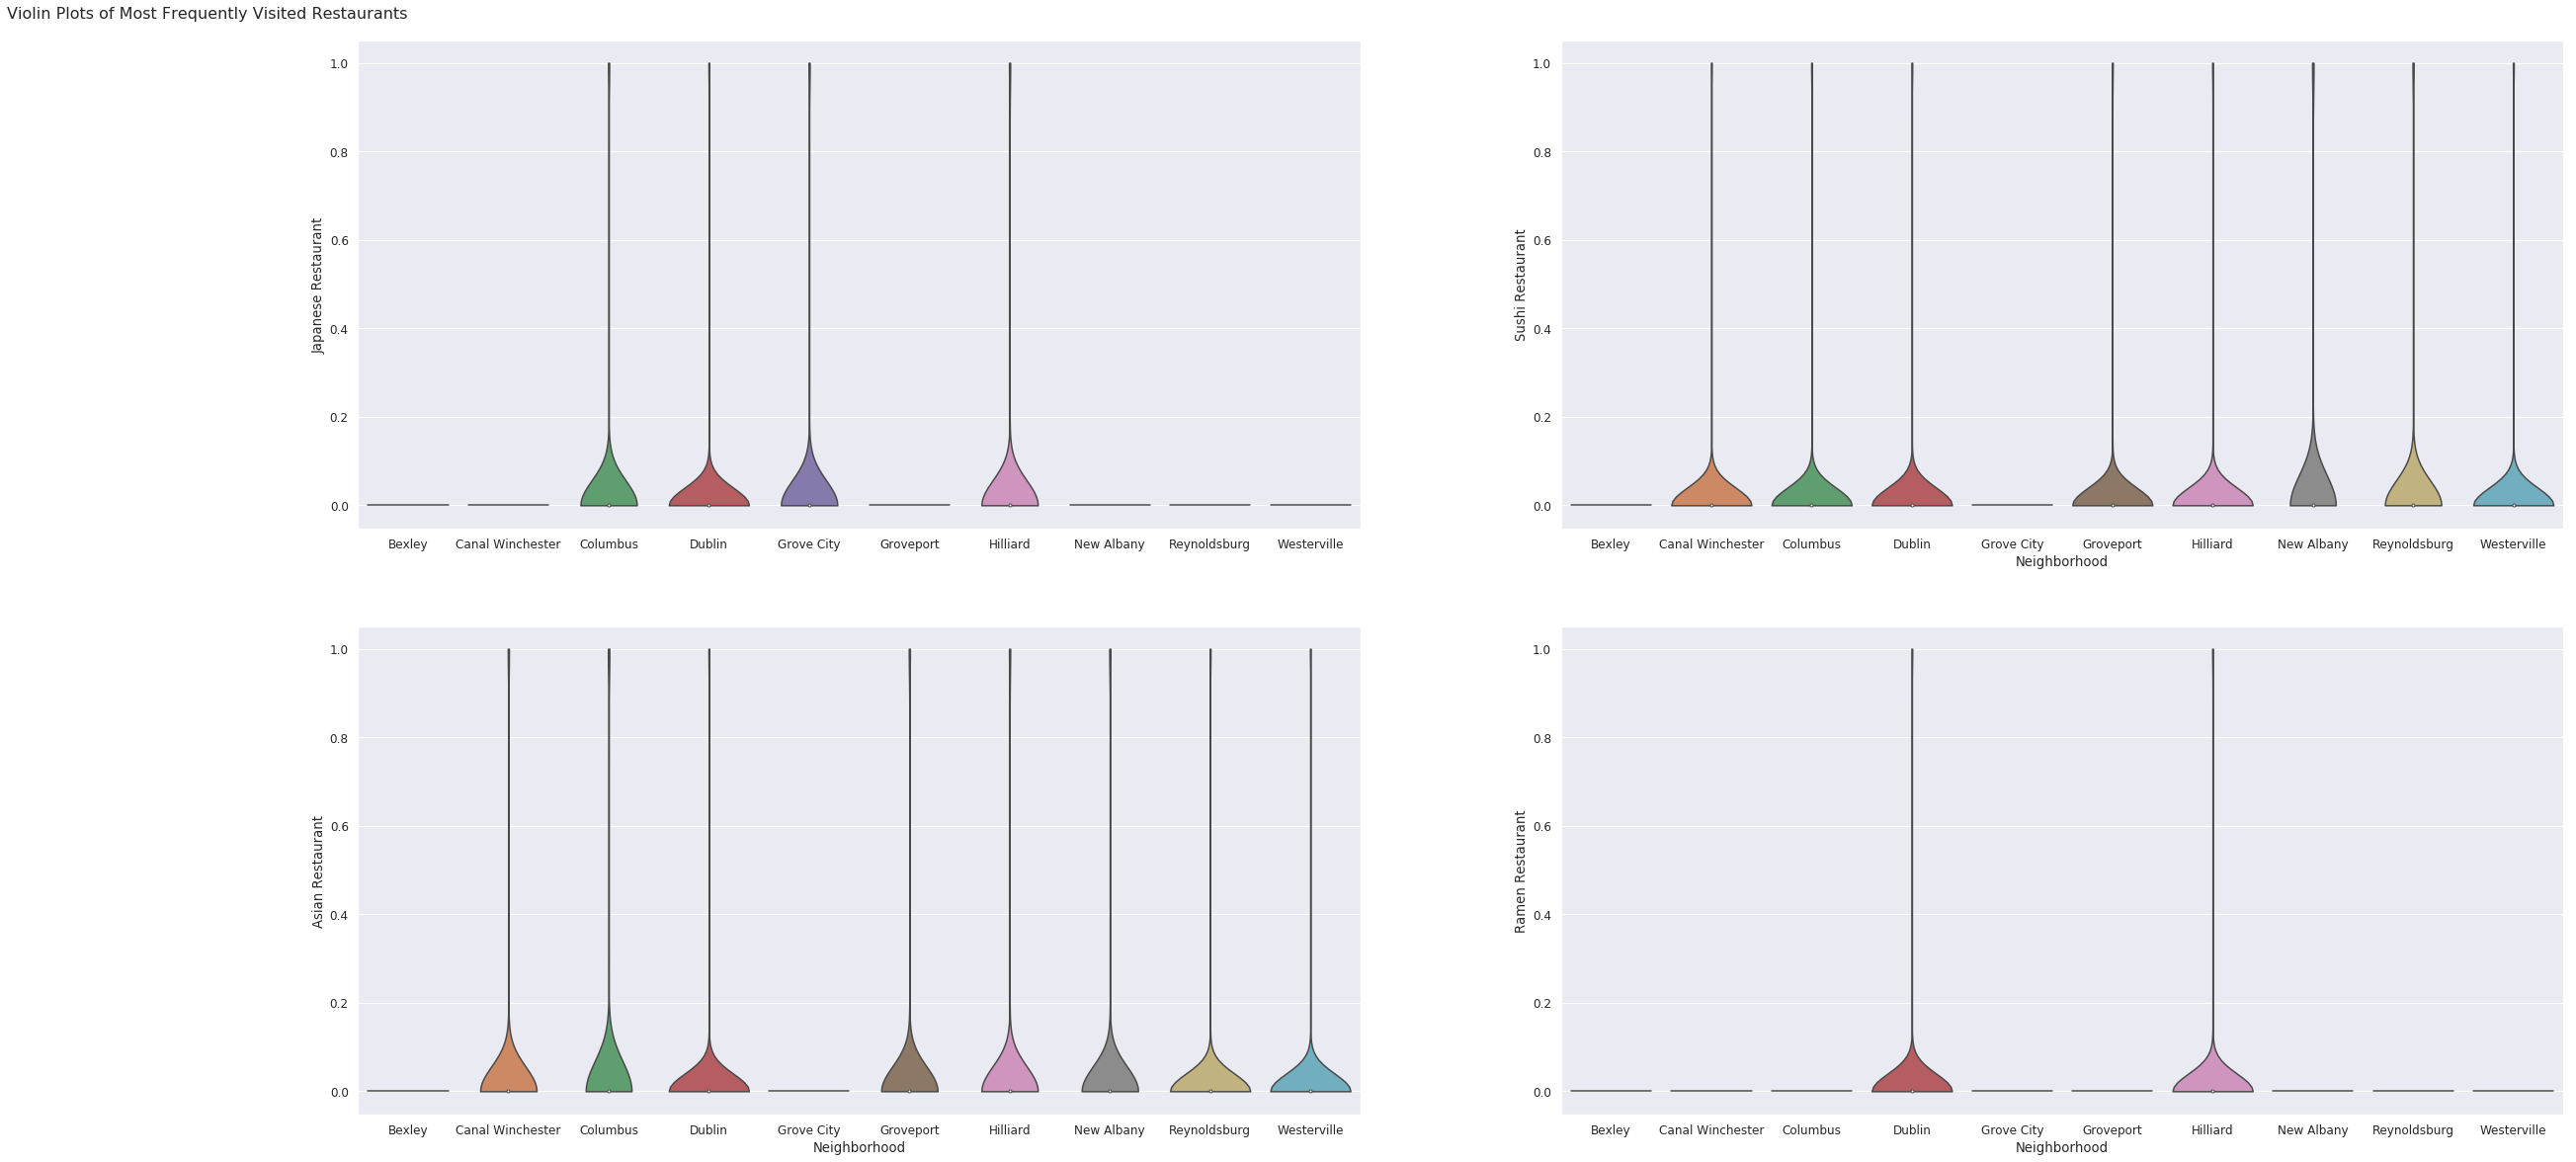

In [62]:
# Let's try Categorical plot 


fig = plt.figure(figsize=(40,20))

sns.set(font_scale=1.1)

ax = plt.subplot(2,2,1)
sns.violinplot(x="Neighborhood", y="Japanese Restaurant", data=franklin_onehot, cut=0);
plt.xlabel("")
plt.subplot(2,2,2)
sns.violinplot(x="Neighborhood", y="Sushi Restaurant", data=franklin_onehot, cut=0);
plt.subplot(2,2,3)
sns.violinplot(x="Neighborhood", y="Asian Restaurant", data=franklin_onehot, cut=0);
plt.subplot(2,2,4)
sns.violinplot(x="Neighborhood", y="Ramen Restaurant", data=franklin_onehot, cut=0);
#ax.title.set_text("5 Major Districts  Violin Plots of Most Frequently Visited Restaurants")
ax.text(-4.0, 1.1, 'Violin Plots of Most Frequently Visited Restaurants', fontsize=16)
plt.savefig ("Violin_plots_Dist_Frequent_Restaurant.png", dpi=240)
plt.show()

[18, 18, 26, 27, 20, 23, 28, 29, 26, 24]


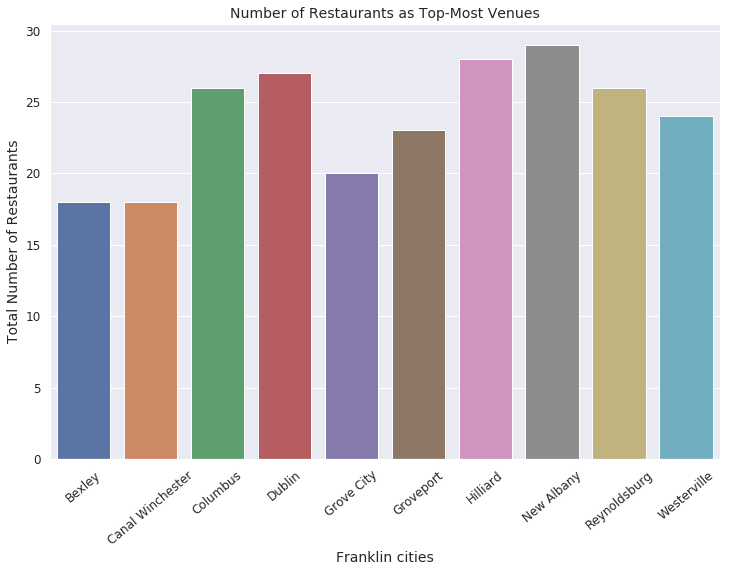

In [63]:
#try groupby to play with restaurant 

franklin_venues_only_restaurant = franklin_venues.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
franklin_venues_only_restaurant_df = franklin_venues_only_restaurant.to_frame().reset_index()
franklin_venues_only_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']

franklin_venues_only_restaurant_df.index = np.arange(1, len(franklin_venues_only_restaurant_df)+1)


list_rest_no = franklin_venues_only_restaurant_df['Number of Restaurant'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='Neighborhood', y='Number of Restaurant', data=franklin_venues_only_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Franklin cities", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

In [64]:
kclusters = 4

franklin_grouped_clustering = franklin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(franklin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 3, 3, 1, 1, 3, 0, 1, 0], dtype=int32)

In [65]:
# add clustering labels
neighborhoods_venues_sorted.rename(columns={'Neighborhood':'City'},inplace=True)



In [66]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

franklin_merged = franklin_data

#to add latitude/longitude for each neighborhood
franklin_merged = franklin_merged.join(neighborhoods_venues_sorted.set_index('City'), on='City')

franklin_merged.head()

,City,Population,County_y,zip,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Bexley,"13,057",Franklin,NaN,39.969238,-82.936864,2,Pizza Place,Bar,Park,American Restaurant,Gastropub,Coffee Shop,Café,Brewery,Taco Place,Cocktail Bar
46,Canal Winchester,"7,101",Franklin,43110.0,39.826340,-82.799450,1,Pizza Place,Coffee Shop,Park,American Restaurant,Brewery,Supermarket,Gym / Fitness Center,Gym,Ice Cream Shop,Italian Restaurant
141,Columbus,"892,672",Franklin,43085.0,40.099860,-83.015700,3,Grocery Store,Ice Cream Shop,American Restaurant,Park,Bar,Gastropub,Steakhouse,Fried Chicken Joint,Greek Restaurant,Asian Restaurant
207,Dublin,"48,647",Franklin,43016.0,40.098590,-83.153760,3,Zoo Exhibit,American Restaurant,Pizza Place,Mexican Restaurant,Italian Restaurant,Ice Cream Shop,Gym,Bar,Diner,Grocery Store
228,Grove City,"41,627",Franklin,43123.0,39.868550,-83.119880,1,Coffee Shop,Park,Sandwich Place,Pizza Place,Bakery,Wings Joint,American Restaurant,Mexican Restaurant,Ice Cream Shop,Brewery


In [67]:
address = 'Columbus, OH'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Ohio are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Ohio are 39.9622601, -83.0007065.


In [68]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(franklin_merged['lat'], franklin_merged['lng'], franklin_merged['City'], franklin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters